<a href="https://colab.research.google.com/github/kavyarajegoist/deep_learning_with_pytorch/blob/main/01_PyTorch_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be almost anything.. in machine learning.

* Excel speadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data inot a numberical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create *known* data using the linear regression formula

In [ ]:
# Create known parameter
weight = 0.7
bias = 0.3

# Create a data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

How might be better visualize our data

This is where the data explorer's motto comes in

In [ ]:
def plot_prediction(train_Data = X_train,
                    train_Label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_Data,train_Label,c="b",s=4,label="Traning data")

  plt.scatter(test_data,test_label,c="g",s=4,label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14})




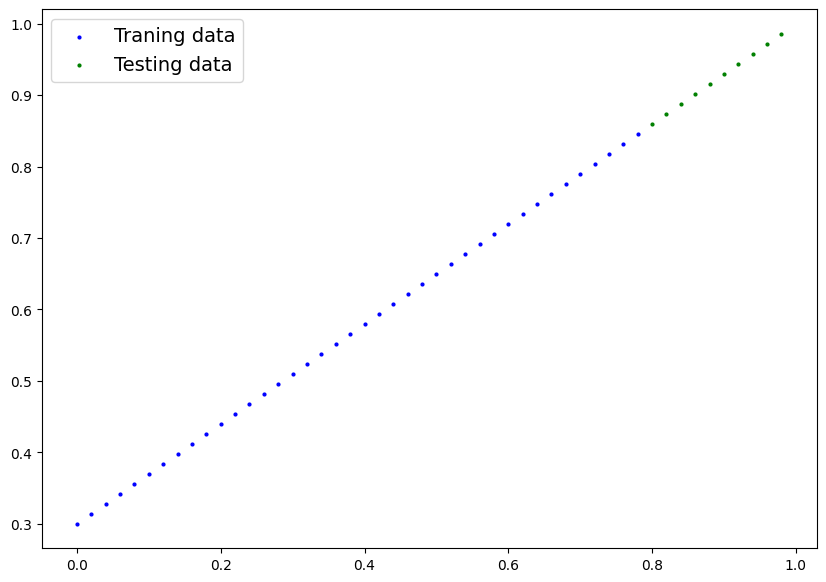

In [ ]:
plot_prediction(X_train,y_train,X_test,y_test)

## 2. Build model

Our first pytorch model

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self,x:torch.Tensor):
      return self.weights * x + self.bias

